### Take home exam

>In the cell below, we import all the python libraries that we will use for this homework:

In [90]:
#DATA MANIPULATION
import numpy as np
import pandas as pd

#STATISTICS
from scipy.stats import chi2
from scipy.stats import skew
import math
import statsmodels.api as sm

#DATA VISUALIZATION
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#SKLEARN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#KNEED LOCATOR
import kneed

#SYS
import  sys

#### 1 - Understanding the methods and concepts of the course
##### 1. Finding outliers (3 points). 
You observe a series $y_{i}$ $_{i\subset [1,N]_{N=100}}$ in which $y_{i}$ stands for the quantity of the product sold in the $i^{th}$store. 
You want to use an outlier procedure to find stores that are selling very small quantities of your product.<br>
**(a) Explain in details your approach to detect those stores.**

>We will use techniques for detecting outliers by choosing a threshold at which we consider a data item to be an outlier. There is no universal method because there is a wide variety of possible distributions for the data. However, we have seen two methods for choosing the threshold: 
>* Choosing it according to the sample mean
>* Choosing it according to the sample median to get a threshold that is not affected by outliers<br>

>These methods are both based on the normal distribution : we assume that the observations are realization of a normal distribution $N(\mu,\sigma^2)$. Therefore, we estimate $\mu$ and $\sigma^2$ to detect the unlikely observations. To compute the estimate mean and variance, we use the following formulas:<br><br>
$\hat{\mu}$ = $\frac{1}{N} \sum_{i=1}^{N}y_i$ <br><br>
$\hat{\sigma}^2$ = $\frac{1}{N-1}\sum_{i=1}^{N}(y_i-\hat{\mu})^2$<br><br>
>Once we have those estimates, we can build an interval that should contains most of the data. Observations outside this interval will be considered as outliers. To build the interval, we need to choose a quantile of the normal distribution, say $97.5$ (this is an arbitrarily fixed limit). For a standard Normal distribution, this quantile is equal to $1.96$. Then, we build the interval that should contains $95\%$ of the observations (if the Normal assumption holds). This interval is given by: <br> $[\bar{y} - 1.96 \sigma,~~ \bar{y} + 1.96 \sigma]$<br>
>This interval comes from the fact that $\frac{y_i-\bar{y}}{\hat{\sigma}} \sim N(0,1)$ so, we have that $P[|\frac{y_i-\bar{y}}{\hat{\sigma}}|\leq 1.96] = 0.95$; Playing with the inequality leads to the interval since we have $y_i<\bar{y} + 1.96 \hat{\sigma} \text{ and } y_i\geq \bar{y} - 1.96 \hat{\sigma}$<br>
>The method with the mean allows the determination of outliers in a dataset that corresponds rather well to the hypotheses that are made for choosing the method of determining outliers (question b). In such a case, this method works well. <br>
<br>
>However, there are sometimes datasets in which the outliers are extreme values, sometimes of a completely different order of magnitude than the data set (for instance in this case, if a store was significantly larger than others). In this type of case, a threshold is chosen according to a statistic that is little affected by the extreme values (which is the case of the mean): the median, with the median of absolute deviation (MAD).<br>
>Therefore, we rethink the outlier detection method by using the median and the MAD as estimates of the expectation and the variance.<br>
>This method also lies on an assumption of normality: the $MAD$ converges to the median of the half normal distribution, which is the $75%$ percentile of a normal distribution, and since $N(0.75)≃0.6745$, we consider $y_{i}$ as an outlier if $|\frac{(y_i-\bar{median}) \times 0.6745}{\hat{MAD}}|=|\frac{y_i-\bar{median}}{1.48 \times \hat{MAD}}|\geq 1.96 $<br>

**(b) Is your approach based on some statistical assumptions ? Detail your answer**

>This approach is based on the standard assumption of normality : we assume that the observations are realization of a normal distribution $N(\mu,\sigma^2)$.<br>
>In some cases, it is therefore necessary to transform the data so that it is closer to the normal distribution (for example by using the logarithm function if the data is right or left skewed)

**(c) What are the advantages of using an outlier detection method compared to a
method that consists of sorting the series in ascending order and then of taking
the 5% smallest values ?**

>The advantage of an outlier detection method is that we do not systematically find a number of values corresponding to $5$% of the number of observations (in the case where we set the threshold according to the $97.5$ quantile). We classify as outliers only those values that are higher in absolute values than a threshold that is supposed to objectively distinguish one outlier from another according to the assumed distribution of data.<br>
>One the one hand, if there are more than $5$% of real outliers, we should distinguish all of them. On the other hand, if there are few or no outliers, we get less than $5$% of the size of the data serie.<br>
>Intuitively, if one were to find outliers in a large number of datasets (similar to the one in this example), one would expect to find a different number of outliers from one dataset to another. On the contrary, the $5$% lowest values method would return $5$ outliers, whether they are outliers or not, and might miss some.

##### 2. (2 points) Let us denote the ith observation of K variables as $x_{i} = (x_{1,i}, x_{2,i},..., x_{K,i})$. For detecting outliers, we compute the Mahanalobis distance for each observation $i = 1,..., N$. <br>We end up with $N$ different values of the squared Mahanalobis distance (denoted by $dMan(x_{i},\mu )^2$ for the $ith$ observation).

**(a) Explain how to choose a threshold value to assess if an observation is an outlier.<br>
On which statistical assumption do you rely to set the threshold ?**

>We are now in the case where there are $K$ variables. We can therefore no longer set a threshold by simply considering the deviation from the observed mean (or median, in the alternative method discussed in 1). We also need to adapt a little bit our assumptions to the multivariate case. <br>
>Similar to when we chose thresholds in the univariate case, in a N-dimension framework we can generate a threshold based on the assumption that the data is multivariate normal-distributed. The Mahalanobis distance should then follow a Chi-squared distribution with K degrees of freedom. We can formulate the assumption as follows :<br><br>
>$dMan(x_{i},\mu )^2 \sim \chi^2(K)$<br><br>
>To choses the threshold, we need to choose a quantile of the Chi-squared distribution, say  $95$%  (this is an arbitrarily fixed limit).<br>
>For instance : for a Chi-squared  distribution with 10 degrees of freedom, this quantile is roughly equal to $18.31$. 
>>$95$%  of the observations' Mahalanobis distance should lie below $18.31$ (if the Chi-squared assumption holds).

In [11]:
chi2.ppf(0.95, 10)

18.307038053275146

**(b) What would be the threshold value using a $99$% quantile of the hi-squared distribution if the number of variables amounts to $K=10$ ?**

>The 99% quantile of a Ch-squared distribution with 10 degrees of freedom $\approx 23.21$

In [12]:
round(chi2.ppf(0.99, 10),2)

23.21

>For a Chi-squared  distribution with 10 degrees of freedom, this quantile is equal to $\sim 23.209$.<br>
>$99$%  of the observations should lie below 23.209 (if the Chi-squared assumption holds).


##### 3. Clustering (3 points). Using the Euclidean distance, we compute the proximity matrix of 5 individuals and get the following result:

In [32]:
#MATRIX
prox = np.array([[10.03 , 50.01 , 195.00, 122.01,  60.01],
                 [50.01 , 5.1   , 245.00, 172.00,  11.05],
                 [195.00, 245.00, 2.35  , 73.00 , 256.00],
                 [122.01, 172.00, 73.00 , 70.2  , 183.01],
                 [60.01 , 11.05 , 256.00, 183.01, 20.03]])

#PRINT
pd.DataFrame(prox, index= range(1,6), columns =range(1,6) )

,1,2,3,4,5
1,10.03,50.01,195.00,122.01,60.01
2,50.01,5.10,245.00,172.00,11.05
3,195.00,245.00,2.35,73.00,256.00
4,122.01,172.00,73.00,70.20,183.01
5,60.01,11.05,256.00,183.01,20.03


**(a) Can the matrix Prox be a proximity matrix ? If not, fix the problem.**

>This matrix cannot bee a proximity matrix. Let us suppose that it is the case. <br>The element at the row $i$ and at column $j$ noted $prox(i,j)$ with $i$,$j$ in $[1,2,3,4,5]$ would be the distance between the individual $i$ and the individual $j$.<br>
>Of course, if $i=j$ (this is the main diagonal of prox), we should have $prox(i,j) =0$. <br> This is not the case with the given matrix. Hense, this is a nonsense.
>One way to fix the problem is to replace the values of the main diagonal of the matrix by zeros :

In [33]:
#"i=j" = "BELONGS TO THE PRINCIPAL DIAGONAL"
for i in range(prox.shape[0]):
    for j in range(prox.shape[1]):
        if i==j:
            prox[i,j]=0

#FIXED MATRIX
pd.DataFrame(prox, index= range(1,6), columns =range(1,6))

,1,2,3,4,5
1,0.00,50.01,195.0,122.01,60.01
2,50.01,0.00,245.0,172.00,11.05
3,195.00,245.00,0.0,73.00,256.00
4,122.01,172.00,73.0,0.00,183.01
5,60.01,11.05,256.0,183.01,0.00


**(b) Using the bottom-up approach of the hierarchical clustering method, we start with five different clusters.Then, we merge the second individual with the fifth individual.<br>
Using the single-linkage hierarchical clustering method, how does the
proximity matrix look like after merging these two individuals ?**

In [52]:
#BOTTOM-UP APPROACH FUNCTION
def algo(prox = prox):
    """
    This function takes the proximity prox in input
    It returns the new matrix using the single-linkage hierarchical clustering method
    """
    rmin = 0
    cmin = 0
    valmin = min(map(max,prox))

    for i in range(prox.shape[0]):
        for j in range(prox.shape[1]):
            if i!=j:
                if prox[i,j]<valmin:
                    rmin = i
                    cmin = j
                    valmin = prox[i,j]

    for i in range(prox.shape[0]):
        prox[i,min(rmin,cmin)] = min(prox[i,rmin],prox[i,cmin])

    #COLUMN DELETED
    prox = np.delete(prox, max(rmin,cmin), axis = 1)

    #ROW DELETED
    prox = np.delete(prox, max(rmin,cmin), axis = 0)
    return prox
    
#NEW MATRIX PRINT
pd.DataFrame(algo(prox = prox), columns = ["1","2-5","3","4"], index = ["1","2-5","3","4"])

,1,2-5,3,4
1,0.00,50.01,195.0,122.01
2-5,50.01,0.00,245.0,172.00
3,195.00,245.00,0.0,73.00
4,122.01,172.00,73.0,0.00


**(c) The characteristics of the five individuals that were used to build the proximity
matrix are the GMAT and the GPA (’admission xlsx.xlsx’).<br> Which distance metric would you advise to build the proximity matrix ?**

In [ ]:
path ="/Users/corneliuscellier/Downloads/"
df = pd.read_excel(path + "admission_results.xlsx")
df.describe()

>Let us procede by elimination. <br>
>* GPA and GMAT are two numerical variables. We can therefore eliminate the Hamming distance from the start.<br>
>* GPA and GMAT don't have the same scales (as we can see with the output of the describe() function : <br>
>>* GPA ranges between 2.13 and 3.8, average GPA is 2.97 <br>
>> * GMAT ranges between 313 and 693, average GMAT is 488 <br>
<br>
>Therefore, we can eliminate the standard Euclidean distance. **We therefore have to choose between standardized Euclidean distance and Mahalanobis distance:**<br>
>* An issue with the standardized Euclidean distance is that it does not take the correlation into account. If two variables are highly correlated, the standardized Euclidean distance essentially measures the same thing twice. Standardized Euclidean distance then assigns equal weight to each variable, and therefore accords more weight to the single characteristic that is measured twice in comparison to the other variables.<br>
>* However, we are not in a situation in which this is a problem because there is only 2 variables. We could be, for instance if there was a third variable, highly correlated to GMAT or GPA. <br>
>* Mahalanobis distance, on the other hand, takes this correlation into account but is less popular because correlation can change from one cluster to another.<br>
>>To conclude, I would rather choose the standardized Euclidean distance. The Mahalanobis distance has no particular advantage over standardized Euclidean distance - *in this case* - and standardized Euclidean distance is more intuitive as it is a simple geometric interpretation of distance.

##### 4. (4 points) You want to invest some money into the financial market but you do not know how to choose the assets. Using a financial application, you observe the following returns over the five past months:

In [17]:
#COLUMNS & INDEX
col = ['Netflix', 'Blackrock']
idx = ['june', 'july', 'august', 'september', 'october']

#RETURNS
returns = np.array([[0.5,2.0],
                   [-2.5,-1.0],
                   [-1.0,-2.0],
                   [1.0,1.5],
                   [2.0,1.0]])

#PRINT
ret = pd.DataFrame(returns, columns = col, index = idx)
ret

,Netflix,Blackrock
june,0.5,2.0
july,-2.5,-1.0
august,-1.0,-2.0
september,1.0,1.5
october,2.0,1.0


**(a) If you have to invest only in one asset, in which company will you invest ? Discuss your answer.**

>When I invest money, I want my investment to be as profitable as possible and the least risky possible.<br>
>In the case of financial assets, the profitability is given by the monthly returns of stocks, and the risk is given by the standard deviation of this profitability:

In [9]:
ret.mean(), ret.std()

(Netflix      0.0
 Blackrock    0.3
 dtype: float64,
 Netflix      1.767767
 Blackrock    1.717556
 dtype: float64)

>If we compute the average returns and the variability of returns, we observe that Blackboard performed better over the considered period ($+0.3$% on average against $0.0$% on average for Netflix).<br>
>The variability is also slightly smaller for Blackrock : the standard deviation is of $\sim 1.72 $ against $\sim1.77$ for Netflix<br>
>It must be said, however, that this is not a good idea to make financial decision based on 5 periods only. Further investigations should be undertaken.

**(b) You want to invest in both assets. What are the weights (i.e., the proportion of your wealth invested in both assets) that minimize the portfolio variance ? Detail your computation.**

>We want to chose  $\omega_1$ and $\omega_2$ such that $\text{Financial portfolio} = \omega_1 \text{Netflix} + \omega_2 \text{Blackrock}$<br>
>We are computing the profitability and the volatility of all possible portfolios with $\omega_1$ in 0, 0.01, 0.02 ... 0.99, 1 (note that $\omega_2$ is inherently defined by $\omega_1$ : $\omega_2 = 1-\omega_1$) in order to find the combinaison that minimizes the portfolio variance<br>
>The profitability of a given portfolio is given by its expected return : 
>>$E[X_p] = \sum_{i=1}^{2} \omega_i . E[X_i] = \sum_{i=1}^{2} \omega_i . \hat{\mu_k}$<br>
>The volatiliy of a given portfolio is given by its variance :
>>$V[X_p] = \omega' .\sum .\omega$ with $\omega =$ weights vector and $\sum$ = covariance matrix

Text(0.5, 1.0, 'Expected returns and standard deviations of 100 portfolios')

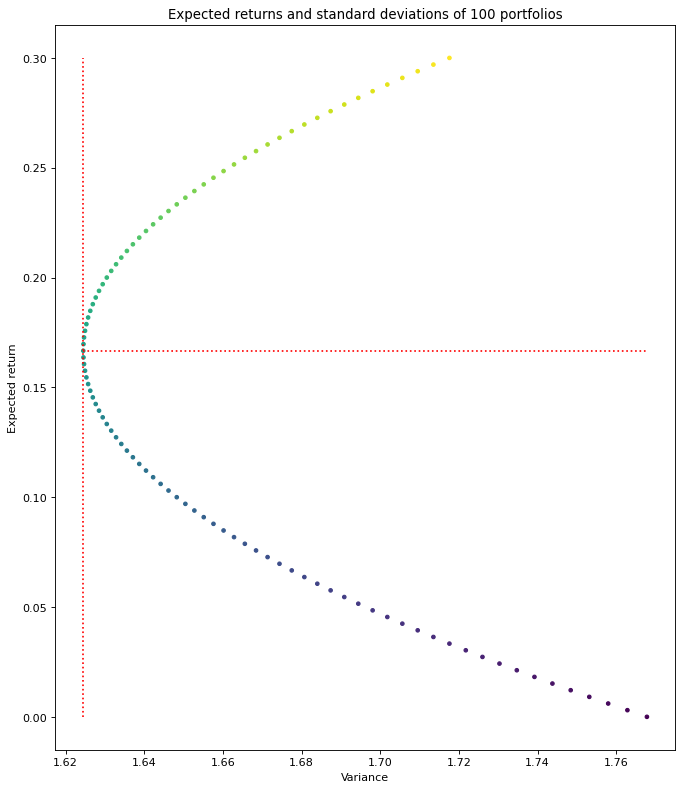

In [107]:
nb_portfolio = 100

#WEIGHTS
weights = np.zeros([nb_portfolio,2])
weights[:,0] = np.linspace(0,1,nb_portfolio)
weights[:,1] = 1-weights[:,0]

#MEAN
ret_mean= ret.mean()

#MEAN OF THE w1,w2 COUPLE
Exp_port = np.sum(weights*np.tile(ret_mean,[nb_portfolio,1]),axis=1)

#VARIANCE OF THE w1,w2 COUPLE
std_port = np.zeros([nb_portfolio,1])
cov_mat = np.cov(ret.transpose())
for i in range(0,nb_portfolio):
    std_port[i] = np.sqrt(np.matmul(weights[i,:],np.matmul(cov_mat,weights[i,:].transpose())))

#PLOT
figure(figsize=( 10,12), dpi=80)
plt.scatter(std_port,Exp_port, c = Exp_port, s = 10)
plt.vlines(std_port[np.argmin(std_port)],min(Exp_port),max(Exp_port), color = 'red',linestyles = 'dotted')
plt.hlines(Exp_port[np.argmin(std_port)],min(std_port),max(std_port), color = 'red',linestyles = 'dotted')
plt.xlabel("Variance")
plt.ylabel("Expected return")
plt.title("Expected returns and standard deviations of 100 portfolios")

>The optimal portfolio is the one that gives the highest possible expected return for a given risk level or the lowest risk for a desired expected return. 
>Portfolios below the efficient frontier are sub-optimal, as they don’t provide enough returns for their risk levels.
>>In this case, the optimal portfolio is composed of 44% of Netflix stock, and 56% of Blackrock stock. It minimizes the variance.

In [11]:
#PRINT
print("The optimal portfolio is composed of",
      round(weights[np.argmin(std_port)][0]*100,2),
      "% of Netflix stocks and",
      round(weights[np.argmin(std_port)][1]*100,2),
      "% of Blackrock stocks.")

The optimal portfolio is composed of 44.44 % of Netflix stocks and 55.56 % of Blackrock stocks.


##### 5. (1 point) We apply the principal component analysis on a dataset and we get the following eigenvalues from the covariance matrix:

In [12]:
#EIGENVALUES
eigen = pd.DataFrame([3.64, 3.34, 2.59, 0.23, 0.02],
                     index = ["λ_1","λ_2","λ_3","λ_4","λ_5"],
                     columns = ['Eigenvalues'])

#PRINT
eigen.T

,λ_1,λ_2,λ_3,λ_4,λ_5
Eigenvalues,3.64,3.34,2.59,0.23,0.02


**(a) What is the number of variables in the dataset ?**

>There is 5 variables in the dataset because there is as much eigenvalues as variables<br>
>The difference lies in the fact that the principal components are constructed from linear combinations of the variables, among other things to explain as much variance as possible with a minimum of new variables (the principal components) so that the number of dimensions in a model can be reduced.<br>
>Here, we can for example explain $\frac{3.64 + 3.34 +2.59}{3.64 + 3.34 +2.59+0.23+0.02} \approx 97$% of the variability in the data with only 3 of the 5 principal components

**(b) What is the sum of the variance of all the variables in the dataset ?**

In [13]:
eigen.sum()

Eigenvalues    9.82
dtype: float64

>One property of the principal components is that the sum of eigenvalues is equal to the sum of variance of non-transformed variables in the dataset.<br>
>Hence we have : $\sum_{i=1}^{5} \lambda_i = \sum_{i=1}^{5} V(x_i)= 9.82$

##### 6. (2 points) In the linear regression framework, we minimize the sum of squared residuals (i.e. $\sum_{i=1}^{N} \hat{\epsilon_i}^2$) to obtain the OLS formula: $\hat{\beta}=(X′X)^−1 X′y$.

**(a) Assuming a simple linear regression framework, $y_i = \beta_0 + \beta_1 . x_i + \epsilon_i$
, explain (in words or in math) why we cannot estimate $\beta_0$ and $\beta_1$ by optimizing the sum of residuals such that the sum is equal to zero (i.e. setting $\sum_{i=1}^{N} \hat{\epsilon_i} = 0$) ?**

>Minimizing  $\sum\limits^n_{i=1} \hat \epsilon_i = \sum\limits^n_{i=1} (y_i - \hat \beta_0 + \hat \beta_1 x_i)$ doesn't quite make sense since the positive and negative residuals could cancel each other. That's why we use the least squares method which minimizes $\sum\limits^n_{i=1} \hat \epsilon_i^2 = \sum\limits^n_{i=1} (y_i - \hat \beta_0 + \hat \beta_1 x_i)^2$<br>
>If we think about it graphically: we'd ideally want to find $\beta_0$ and $\beta_1$ such that the line reduces residuals to the minimum posssible, but a line that reduces the absolute distance between observation and estimations to zero may not exist (unless correlation=1) and a line that reduces the relative distance between observation and estimations to zero may give us multiple $(\beta_0,\beta_1)$ couples. **For example** : if we are estimating a $\beta$ by setting the sum of residuals to $0$ for the identity function, both the lines of equation y=0 and y=x verify this condition, we can clearly see that the positive and negative residuals compensate:

Text(0.5, 1.0, 'example of a non optimal solution while sum of residuals = 0')

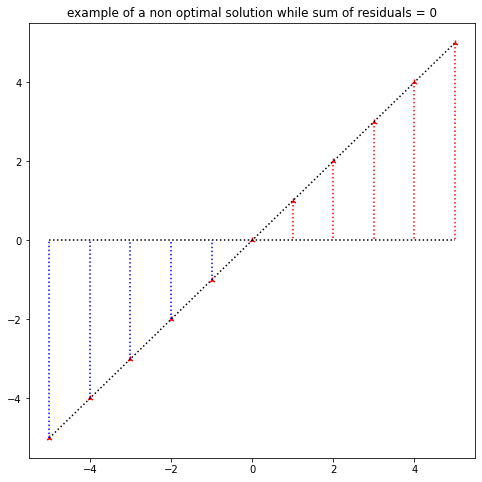

In [13]:
#PLOT OF NON OPTIMAL SOLUTION WITH SUM OF RESIDUALS = 0
#PRELIMINARY
plt.subplots(figsize=(8, 8))
x = range(-5,6)
zer = [0,0,0,0,0,0,0,0,0,0,0]

#SCATTER PLOT
plt.scatter(x,x,color = 'red', marker = '2')
plt.plot(x,x, linestyle = 'dotted', color = 'k')
plt.plot(x,zer,linestyle = 'dotted', color = 'k')
for i in range(-5,6):
    if i>=0:
        plt.plot([i,i],[i,0],linestyle = 'dotted',color = 'red')
    else:
        plt.plot([i,i],[i,0],linestyle = 'dotted',color = 'blue')
        
plt.title("example of a non optimal solution while sum of residuals = 0")

>We could find multiple couples of $\beta_0$ and $\beta_1$ such that $\sum_{i=1}^{N} \hat{\epsilon_i} = 0$, but minimizing the squared residuals $\hat \epsilon_i^2$ makes more sense because it allows us to find the value of $\beta_0$ and $\beta_1$ that minimize the sum of absolute errors $\sum_{i=1}^{N} |\hat{\epsilon_i}| $. Finally, the squared euclidean distance is a convex function which is helpful when it comes to find $\beta$. That is why we prefer this method to minimizing the sum of absolute errors.

**(b) Explain why we should not compare two linear models exhibiting different number
of explanatory variables using the coefficient of determination.**

>We do not compare two linear models with a different number of explanatory variables using the coefficient of determination because the coefficient of determination $R^2$ increases mechanically when we add a variable to a model.<br>
>If we had a model $M_1$ that was equal to a model $M_2$ with an explanatory variable $x_k$ in addition to this model, we would have $R_1^2>R_2^2$ even if the variable $x_k$ does not contribute anything to the model, and/or is not significant!

#### 2 Applications and interpretations
We consider the mobile applications (’apps’) that have been used on iPhone from September 6, 2010 to August 31, 2011 and we seek to explain why an app is successful. Our dependent variable $killer apps$ denotes apps that appeared in the top 300 ranking apps by gross sales.Let us denote $K_i$, the game apps such that $K_i = 1$ if the $i_{th}$ app is a killer app and $K_i = 0$ otherwise.

##### 1. (7 points) We estimate a Logit model given by,$P[K_i= 1|x_i] = f(\beta_1 + \beta_2 .x_{i,2} + \beta_3 .x_{i,3} + \beta_4 .x_{i,4})$ where $f()$ denotes the logistic function, $x_{i,2}, x_{i,3}, x_{i,4}$ stand for the average rating (from 1 to 5), the price and the size of the game app, respectively. Figure 1 shows the Python output
**(a) What are the significant variables ?**

>All variables are significant - say at a 95% confidence level - since we have $|z_2|>1.96$, $|z_3|>1.96$ and $|z_4|>1.96$ and consequently $p-value_2<0.05$, $p-value_3<0.05$ and $p-value_4<0.05$ in the model summary<br>
>We also have $p-value_{LLR}$ close to $0$, which means that the variables are jointly significant (equivalent to the F-test)

**(b) If the average price of an application increases, what would be the impact on the
probability of this app to become popular (i.e., a ’killer’ app) ?**

>If the average price of an application increases, the probability of this app to become popular would increase as well. To demonstrate this, let us compare X and X' with:<br>$X_i = (x_{i,2}, x_{i,3},x_{i,4})$ and <br>$X_i' = (x_{i,2}, (x_{i,3}+1),x_{i,4})$<br>
>>We know that $x_{i,2}$ is the score of the app, $x_{i,3}$ is the price of the app and $x_{i,4}$ is the size of the app : we are comparing 2 predictions of equal variables, but one with 1 unit higher in 'price'<br>
<br>
>$(P[K_i= 1|X'_i] - P[K_i= 1|X_i])= f(\beta_1 + \beta_2 .x_{i,2} + \beta_3 .x_{i,3} + \beta_4 .x_{i,4})-f(\beta_1 + \beta_2 .x_{i,2} + \beta_3 .(x_{i,3}+1) + \beta_4 .x_{i,4})$<br>
<br>
>let us assume that S = $(\beta_1 + \beta_2 .x_{i,2} + \beta_3 .x_{i,3} + \beta_4 .x_{i,4})$<br> We then have:<br>
>$(P[K_i= 1|X'_i] - P[K_i= 1|X_i])=\frac{e^S . e^{\beta{2}}}{1+e^S.e^{\beta{2}}}-\frac{e^S}{1+e^S}$<br>
>$=\frac{e^S.e^{\beta{2}} + e^{2S}.e^{\beta{2}} - e^S - e^{2S}.e^{\beta{2}}}{1+e^S . (1+e^S . e^{\beta{2}})} = \frac{e^S .(e^{\beta{2}} - 1)}{(1+e^S).(1+e^S . e^{\beta{2}})} \frac{>0}{>0} >0$ because $\beta_2>0$ and $(1+e^S).(1+e^S . e^{\beta{2}})>0$<br>

>We showed that if thee price increases of 1 unit, the probability for the app to be a $\text{killer app}$ increases by the positive quantity $(P[K_i= 1|X'_i] - P[K_i= 1|X_i])$

**(c) Does the Logit model improve over the unconditional probability model (i.e., a
model with a constant and no explanatory variables) ? Explain your answer.**

>This model is doing better than the unconditional probability model since the LLR p-value is very close to 0.<br>
>The LLR tests compares our model ot a restricted model with no explanatory variables, similar to the F-test in a linear model, it tests the joint significance of the variables.<br>
>The null hypothesis is that the restricted model performs better but a low p-value suggests that we can reject this hypothesis and prefer the full model over the null model, the variable are jointly significant.

>

**(d) Predict the probability of an application to become popular if the application has
an average rating of 3, an average price of 10 dollars and an average size of 30.
Give also the formula that has been used to obtain this prediction.**

>The probability is given by $P[K_i= 1|X_i])=f(\beta_1 + \beta_2 .x_{i,2} + \beta_3 .x_{i,3} + \beta_4 .x_{i,4})= \frac{exp(\beta_1 + \beta_2 .x_{i,2} + \beta_3 .x_{i,3} + \beta_4 .x_{i,4})}{1+exp(\beta_1 + \beta_2 .x_{i,2} + \beta_3 .x_{i,3} + \beta_4 .x_{i,4})}=\frac{exp(-5.0502 + 0.5398.3 + 0.2755 .10 + 0.0122 .30)}{1+exp(-5.0502 + 0.5398.3 + 0.2755 .10 + 0.0122 .30)} \approx 0.42$

In [54]:
#COEFICIENTS
beta_0,beta_1,beta_2,beta_3 = -5.0502, 0.5398, 0.2755, 0.0122

#APP DATA
rating = 3
average_price = 10
average_size = 30

#PROBABILITY
result = math.exp(beta_0 + beta_1*rating + beta_2*average_price+ beta_3*average_size)/(1+math.exp(beta_0 + beta_1*rating + beta_2*average_price+ beta_3*average_size))

#PRINT
print(round(100*result,2),"%")


42.32 %


>According the logistic regression model, the predicted probability for the app to become popular is $\approx$ 0.42.

**(e) Using the Logistic regression, Figure 2 shows the Top Lift from 10% up to 100%. Interpret the value of the Top Lift 20%.**

>We see in the graphic that the top lift 20% is about $2.7$<br>
<br>
>The lift measures how much better one can expect to do with the predictive model comparing without a model.It is the ratio of gain % to the random expectation % at a given decile level. The random expectation at the $x^{th}$ decile is $x$%.<br>
>The top $20$% Lift of about $2.7$ for top two deciles : it means that when selecting 20% of the top records based on the model, one can expect $2.7$ times the total number of killer apps found by randomly selecting 20% without a model.

##### 2. (2 points) Using the k-nearest neighbors (k-NN) algorithm with k = 5 and the leaveone-out cross-validation, we obtain the following confusion matrix:

In [44]:
#CONFUSION MATRIX
conf = np.array([[6991, 157],
                 [425, 110]])
columns = ['actually positiv', 'actually negativ']
idx = ['predicted positiv', 'predicted negativ']

#PRINT
pd.DataFrame(conf,columns = columns, index = idx)

,actually positiv,actually negativ
predicted positiv,6991,157
predicted negativ,425,110


**(a) What are the false Positive rate and false Negative rate ?**

In [1]:
#RATIOs
VP = conf[0,0]
VN = conf[1,1]
FP = conf[0,1]
FN = conf[1,0]

FPr = FP/(FP + VN)
FNr = FN/(FN+VP)

#PRINT
print('False positive rate :',round(FPr*100,2),'%\nFalse negative rate :',round(FNr*100,2),'%')

NameError: name 'conf' is not defined

>The false positive rate is given by : $FP = \frac{\text{Total number of false positive}}{\text{Total number of actually negative}} = \frac{157}{157+110} = 0.588 \approx 58.8$%<br>
>The false negative rate is given by : $FN = \frac{\text{Total number of false negative}}{\text{Total number of actually positive}} = \frac{425}{425+6991} = 0.0573 \approx 5.7$%

In [46]:
#CALCULATIONs
sensibility = VP/(VP+FN)
specificity= VN/(VN+FP)

#PRINT
round(sensibility*100,2),round(specificity*100,2)

(94.27, 41.2)

>We also can compute other confusion matrix evaluation KPIs : sensibility and specificity

**(b) What is the percentage of correctly classified observations ?**

In [47]:
#CALCULATION
accuracy = (VP+VN)/(VP+VN+FP+FN)

#PRINT
print('Accuracy:',round(accuracy*100,2),'%')

Accuracy: 92.42 %


>The correctly classified observations rate is given by : $PCC = \frac{\text{Correctly classified observations}}{\text{Total number observations}} = \frac{6991 + 110}{6991 + 110 + 425 + 157} = 0.9242 \approx 92$%<br>

**(c) Does the k-nearest neighbors algorithm achieve good predictive performance knowing that the unconditional probability of being a popular application amounts to
7% ? Discuss your answer.**

>There is 267 'killer app' in the dataset, which represents about $3.5$% of the dataset:

In [23]:
(conf[1,1]+conf[0,1]), round((conf[1,1]+conf[0,1])*100/conf.sum(),2)

(267, 3.48)

>7% of these 7683 observations corresponds to about 537 observations:

In [24]:
int(0.07*conf.sum())

537

>In a naïve model, we should have : <br>
>* sum of negativ predictions = 7% of total number of observations<br>
>* sum of positiv predictions = 93% of total number of observations<br>
>* sum of actually negativ observations = 267<br>
>* sum of actually positiv observations = 7416 <br>

>Under these constraints, we can compute the confusion matrix of a naïve model:

In [51]:
#PRELIMINARY
tot = conf.sum()
prop = [0.93,0.07]
prop2 = [7416/tot,267/tot]

#CONFUSION MATRIX NAIVE MODEL
conf_naiv = np.array([[0,0],
                      [0,0]])
for i in range(2):
    for j in range(2):
        conf_naiv[i,j] = tot * prop[i] * prop2[j]
        
#PRINT
pd.DataFrame(conf_naiv,columns = columns, index = idx)

,actually positiv,actually negativ
predicted positiv,6896,248
predicted negativ,519,18


In [50]:
VP2 = conf_naiv[0,0]
VN2 = conf_naiv[1,1]
FP2 = conf_naiv[0,1]
FN2 = conf_naiv[1,0]

#RATIOS
accuracy2 = round(100*(VP2+VN2)/(VP2+VN2+FP2+FN2),2)
sensibility2 = round(100*VP2/(VP2+FN2),2)
specificity2 = round(100*VN2/(VN2+FP2),2)

#PRINT
accuracy2, sensibility2, specificity2

(90.01, 93.0, 6.77)

>We can compare our first model to a naive model.<br>
>The first thing that we can observe is that our naive model has an accuracy of $\approx 90$%, which could be interpreted as a good accuracy. However, this is :
> * 1 : less than the K-NN algorithm, which is an indicator that it is doing better predictions than a naive model
> * 2 : only due to the large proportion of positive predictions<br>
<br>
>When we compare these 2 models, we see that the specificity is $\approx$ 6 times lower with a naive model : this model has very poor performances when it comes to predict the succes of an app which the main goal !<br><br>
>We can conclude that the K-NN algorithm has way better performance than the naive model, and quite good performance taking into consideration that we have only 3 variables in our model. 

##### 3. (1 point) The percentage of correctly classified observations of the Discriminant analysis amounts to 60% using the leave-one-out cross-validation. Does the Discriminant Analysis dominate the k-NN algorithm ?

>First, the k-NN algorithm scores better than the discriminant analysis in terms of PCC ($92 \% > 60 \%$). However, this does not give us complete information about the algorithm performance. If there is an imbalance between the number of actually positive or negative observations, the PCC does not tell us clearly in which direction the model is wrong / successful in predicting. We would rather use the precision, specificity, false negative rate and false positive rate etc...<br>
<br>
>On the other hand, the k-NN algorithm is a non-parametric approach. This means no assumptions are made about the shape of the decision boundary. Therefore, we can expect this approach to dominate the discriminant analysis when the decision boundary is highly non-linear; there is certain cases in which it is better to use a different method to classify an observation. For instance, if the data is not in an elliptical shape.

#### 3 Dealing with a new dataset
Everyday, traders rely on statistical models to give a price to options. When the option is not correctly priced, a trader can benefit from the mis-pricing and makes money. A standard model to price a call option is called the Heston model. <br><br>In such a model, the price depends on several characteristics that are the volatility ($V_0$), some parameters ($\kappa$, $\theta$,$\sigma$, $\rho$ and $\eta$) and some option attributes that are the risk-free rate ($\text{rf}$), the dividend rate ($div$), the moneyness $\frac{S_0}{K}$ (without unit), and the strike ($K$, in dollars).<br><br>You do not need to know about the Heston model and the variables to solve this exercise.In particular, you are expected to use the tools presented in the course for finding interesting patterns and for predicting the price of the call options (’Call prices’) given by the Heston model.

>First, we import the dataset:

In [21]:
#IMPORT
path = "/Users/corneliuscellier/Downloads/"
df = pd.read_excel(path + "Heston.xlsx")
df.describe()

,Call prices,V0,kappa,theta,sigma,rho,eta_v,rf,div,S0/K,K
count,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000
mean,183.747420,0.249864,2.557558,0.105094,0.524190,-0.640200,1.547871,0.003224,0.017307,1.021105,930.610388
std,76.546376,0.143698,1.412883,0.054769,0.274082,0.196203,0.837744,0.001199,0.000670,0.093590,113.635015
min,0.314008,0.000003,0.100076,0.010001,0.050001,-0.979996,0.100142,0.001788,0.016647,0.885631,755.798269
25%,130.615154,0.126462,1.338537,0.057594,0.286074,-0.809767,0.815462,0.001788,0.016647,0.923298,860.770251
50%,178.922685,0.249496,2.554657,0.105117,0.524386,-0.640078,1.551731,0.003402,0.016843,0.996335,909.325123
75%,228.848006,0.374550,3.782978,0.152376,0.761830,-0.470897,2.275841,0.004267,0.017790,1.119270,1022.346595
max,590.628803,0.499998,4.999986,0.199996,0.999965,-0.300002,2.999999,0.005263,0.018734,1.138669,1150.139919


>We observe that all variables don't have the same scales.

**1. (4 points) Using a threshold of 99%, how many outliers in the ’call prices’ variable do you detect ?**

>We are going to use the outliers detection techniques discussed in the first questions of this homework. Let us first plot the variable on an axis and plot its distribution aswell in order to assess the normality (which is the condition for using our techniques)

>

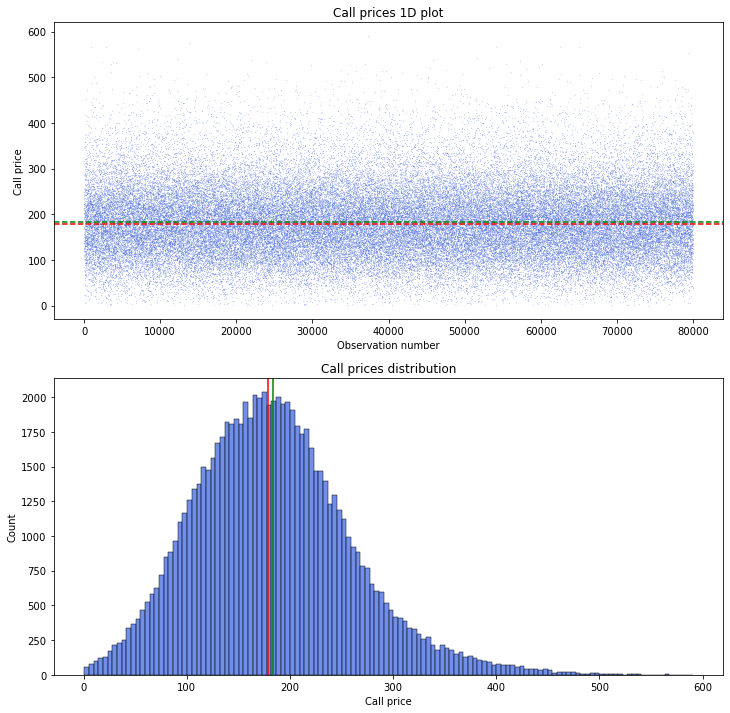

In [22]:
#OUTLIER DETECTION : NORMALITY ASSUMPTION
#PRELIMINARY
x = range(len(df))
y = df["Call prices"]

#SUBPLOTS
fig, axs = plt.subplots(2,1)
fig.set_size_inches(12, 12)

#AVERAGE METHOD
axs[0].scatter(x, y, color = "royalblue", s =0.01)
axs[0].set_xlabel("Observation number")
axs[0].set_ylabel("Call price")
axs[0].axhline(y.mean(), c='green', lw=1.5, linestyle='dashed')
axs[0].axhline(y.median(), c='red', lw=1.5, linestyle='dashed')
axs[0].title.set_text('Call prices 1D plot')

#MAD METHOD
axs[1] = sns.histplot(y,color = "royalblue")
axs[1].set_xlabel("Call price")
axs[1].set_ylabel("Count")
axs[1].axvline(y.mean(), c='green', lw=1.5)
axs[1].axvline(y.median(), c='red', lw=1.5)
axs[1].title.set_text('Call prices distribution')

In [23]:
#SKEWNESS
skew(y)

0.5571468242271947

>The skewness $\gamma$ is a measure of weather the data is skewed.Here, $\gamma_{CP}>0.5$ hence the call prices is moderately right skewed.<br>
>Even if it is slightly right skewed, the data does not seems to deviate much from a normal distribution (we don't need to use the logarithm to reduce the skewness, it would deviate the data from a normal distribution more than what it is already). We also observe that graphically, the diffence between median and mean does not seems to be large.<br>
<br>
>We therefore validate the normality hypothesis. In the next cell, we create a function that plots the outlier detection graphs and returns a list of outliers detected for each method (MAD - median and STD - mean).

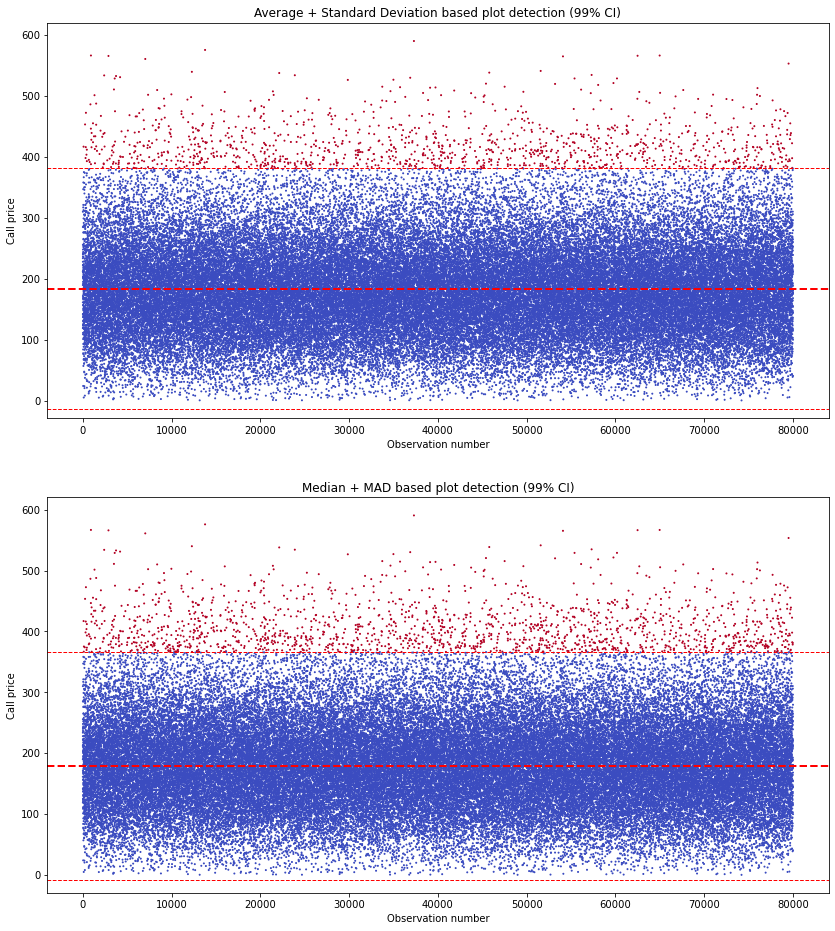

In [24]:
#OUTLIER DETECTION : FUNCTION

def detection(array):
    #CONFIDENCE INTERVAL (99%)
    median, MAD = np.median(array),  np.median(np.abs(np.median(array)-array))
    mean, std_dev = np.mean(array), np.std(array)
    
    ymin1, ymax1 =mean-(2.58*std_dev), mean+(2.58*std_dev)
    ymin2, ymax2 = median-2.58*(1.48*MAD), median +2.58*(1.48*MAD)
    
    #SUBPLOTS
    fig, axs = plt.subplots(2,1)
    fig.set_size_inches(14, 16)
    
    #MEAN METHOD
    axs[0].scatter(x = range(0,len(array)), y = array, alpha =1, c = np.logical_or(array<ymin1,array>ymax1), cmap = "coolwarm", s = 1)
    axs[0].set_title("Average + Standard Deviation based plot detection (99% CI)")
    axs[0].set_xlabel("Observation number")
    axs[0].set_ylabel("Call price")
    axs[0].axhline(y=ymin1, c='red', lw=1, linestyle='dashed')
    axs[0].axhline(y=ymax1, c='red', lw=1, linestyle='dashed')
    axs[0].axhline(y=mean, c='red', lw=2, linestyle='dashed')
    axs[0].set_facecolor('w')
    
    #MAD METHOD
    axs[1].scatter(x = range(0,len(array)), y = array, alpha =1, c = np.logical_or(array<ymin2,array>ymax2), cmap = "coolwarm", s =1)
    axs[1].set_title("Median + MAD based plot detection (99% CI)")
    axs[1].set_xlabel("Observation number")
    axs[1].set_ylabel("Call price")
    axs[1].axhline(y=ymin2, c='red', lw=1, linestyle='dashed')
    axs[1].axhline(y=ymax2, c='red', lw=1, linestyle='dashed')
    axs[1].axhline(y=median, c='red', lw=2, linestyle='dashed')
    axs[1].set_facecolor('w')
    
    #COMPUTE & RETURNS THE OUTLIERS
    outlier1 = []
    outlier2 = []
    
    for i in range(len(array)):
        if array[i]<=ymin1 or array[i]>=ymax1:
            outlier1.append([i,array[i]])
        if array[i]<=ymin2 or array[i]>=ymax2:
            outlier2.append([i,array[i]])
            
    return(outlier1, outlier2)

#FUNCTION CALLED
Out1_Avg, Out2_MAD = detection(df["Call prices"])

In [25]:
len(Out1_Avg), round(len(Out1_Avg)*100/len(y),2), len(Out2_MAD), round(len(Out2_MAD)*100/len(y),2)

(1240, 1.55, 1675, 2.09)

>With the average method, we find that there is 1240 outliers which corresponds to $\approx 1.55$% of observations<br>
>With the MAD method, we find that there is 1675 outliers which corresponds to $\approx 2.09$% of observations<br>
<br>
>In this case, we could use both method since N is large ($N = 79999$) and also because there is not **very** extreme values

In [26]:
MAD = round(1.48*np.median(np.abs(np.median(y)-y)),2)
std_growthrate = round(np.std(y),2)
MAD, std_growthrate

(72.65, 76.55)

>Indeed, if we compare the MAD and the standard deviation of the data, the difference is not large compared to the magnitude of the data

**2. (4 points) Do you find evidence of clusters in the dataset ? Detail your approach.**

>For this question, we cannot use the hierarchical clustering approach because the dataset is too large : as $N = 79 999$, we would have to compute $79 999^2 = 6 399 840 001$ distances which is not achievable in a reasonable time.<br><br>
>Therefore, we will use the K-means approach : given our observations and an integer k, the method consists in dividing them into k clusters, so as to minimize the sum of the distance of the points to the average of the points of their respective clusters.

In [85]:
#IMPORT
path = "/Users/corneliuscellier/Downloads/"
df = pd.read_excel(path + "Heston.xlsx")
df2 = df.copy()

#SHAPE
row, col = df2.shape
print(f'There are {row} rows and {col} columns') 

There are 79999 rows and 11 columns


>We start by standardizing the data because variables have different scales:

In [86]:
columns = df2.columns

#STANDARDISATION
scaler = StandardScaler()
scaler.fit(df2)
data = scaler.transform(df2)

#PRINT
pd.DataFrame(data, columns = columns).head(5)

,Call prices,V0,kappa,theta,sigma,rho,eta_v,rf,div,S0/K,K
0,0.370944,-0.340295,-0.804774,-1.091258,-0.631779,-0.739859,1.230402,0.869896,-0.984398,-0.853735,1.326617
1,-0.292052,-1.168653,0.874979,0.795592,-0.165485,-0.140519,0.267703,0.148866,-0.691005,-0.264664,0.807293
2,0.079001,0.454470,-0.004869,0.877292,0.533885,-1.138325,-0.563781,0.148866,-0.691005,-0.264664,0.807293
3,0.654605,-0.356975,-0.130772,0.367666,-0.482640,1.658979,-0.118108,0.869896,-0.984398,1.048900,-0.187314
4,1.652433,1.454895,-0.876521,-0.618961,0.047632,0.226858,1.229737,0.148866,-0.691005,-1.447537,1.931895


>Now we have standardized the data, we are going to use the K-Means algorithm to find clusters.<br>
>First, we write some useful functions:
> * Euclidean distance function (we'll use the standardized euclidean distance metric to take the scale of variable into consideration
> * K-Means algorithm: for a given integer K, it will
>> - Randomly relate each observation to one of the K cluster 
>> - Compute the average of each cluster (also called 'centroïd'
>> - For each observation, compute the distance with respect to each cluster average.
>> - Create a new partition P’ by assigning each observation to its closest cluster.
>If the new partition is the same as the previous one, we can stop: the algorithm converged to a stable state.<br>
>The problem is that K-Means results are sensitive to the initial partition. If it is very different from the best partition is unlikely to lead to the global optimum. To solve this isssue, we run many times the K-means algorithm with different initial partitions and we select the K-means partition that gives the smallest aggregate distance.
>* To choose the number of clusters, we use a function that runs the K-means algorithm several times for several number of clusters and save the aggregate distance + the inertia given by the best partitions. <br>
> * Then, we can find the elbow point on the graphic that plots the aggregate distance with respect to the number of clusters. To help us find the elbow point, we use the function kneed.KneeLocator.

In [87]:
#FUNCTIONS
#1) EUCLIDEAN DISTANCE BETWEEN 2 VECTORS
def Euclidean_dist(x1,x2):
    """
    computes the euclidean distance between the vectors 'x1' and 'x2' 
    same dimensions for 'x1' and 'x2' is required
    
    """
    if(np.size(x1)!=np.size(x2)):
        sys.exit("Dimension issue")
    if(len(np.shape(x1))==1):
        euc_dist = np.sqrt(np.sum((x1-x2)**2))
    else:
        euc_dist = np.sqrt(np.sum((x1-x2)**2,axis=1))
    return euc_dist

#2) K-MEANS ALGORITHM FOR K AND NUM OF REPLICs
def Kmeans_algo(y,nb_K,replic=20):
    """
    returns the best K-Means algorithm output given : 
    -a dataset 'y',
    -the number of samples 'k',
    -the number of different initial states 'replic'
    
    """
    N = np.size(y,0)

    if(len(np.shape(y))==1):
        y = np.array(y,ndmin=2)
    dimension = np.size(y,1)
    idx_save = np.zeros([N,500])
    
    for i in range(0,replic):
        ### Initialisation of the K-means algorithm
        dist = np.zeros([N,nb_K])
        mu = np.zeros([nb_K,dimension])
        
        if(nb_K>1):
            nb_init = 1000
            idx_start = np.random.randint(0,high=(nb_K-1),size=[N,nb_init])
            std_init = np.std(idx_start,axis=0)
            idx_to_select = np.argsort(std_init)
            idx = idx_start[:,idx_to_select[int(np.floor(i*nb_init/replic) + 1)]]
            
        else:
            idx = np.zeros(N)
            
        ### K-means
        convergence = 0
        idx_save[:,0] = idx
        count = 0
        
        while(convergence==0):
            
            for k in range(0,nb_K):
                if(np.sum(idx==k)>0):
                    mu[k,:] = np.mean(y[idx==k,:],axis=0)
            idx_prev = idx.copy()
            
            for k in range(0,nb_K):
                dist[:,k] = Euclidean_dist(y,np.tile(mu[k,:],[N,1]))
            idx = np.argmin(dist,axis=1)
            if(np.sum(idx==idx_prev)==N):
                convergence = 1
            count = count +1
            idx_save[:,count] = idx
        dist_min = 0
        inertia = 0
        
        for k in range(0,nb_K):
            dist_min = dist_min + np.sum(dist[idx==k,k])
            inertia = inertia + np.sum(dist[idx==k,k]**2) 
            
        if(i==0):
            idx_all = idx_save[:,0:(count+1)]
            idx_best = idx
            dist_best = dist_min
            inertia_best = inertia
        elif(dist_min<dist_best):
            idx_all = idx_save[:,0:(count+1)]
            idx_best = idx
            dist_best = dist_min
            inertia_best = inertia    
    return  idx_best,idx_all,dist_best,inertia_best

#3) AGREGATE DISTANCE FOR K BETWEEN 1 AND INPUT VARIABLE MAK_K
def dist_per_cluster(y,max_k,replic):
    """
    runs the K-Means algorithm:
    -for a dataset 'y'
    -for the 'k' first integer
    -by setting the number of different initial states per cluster to 'replic'
    """
    dist = np.zeros([max_k,1])
    inert = np.zeros([max_k,1])
    for k in np.arange(1,max_k+1):
        output = Kmeans_algo(y,k,replic)
        dist[k-1] = output[2]
        inert[k-1] = output[3]
    return dist, inert

>We run the function that runs the K-means algorithm several times for several number of clusters and save the aggregate distance given by the best partitions.<br>
>Since the ideal number of clusters is not crystal clear, we use the kneedlocator to determine it

In [88]:
dist, inert = dist_per_cluster(data,20,20)

Optimal number of clusters (based on agregate distance): 6
Optimal number of clusters (based on inertia): 6


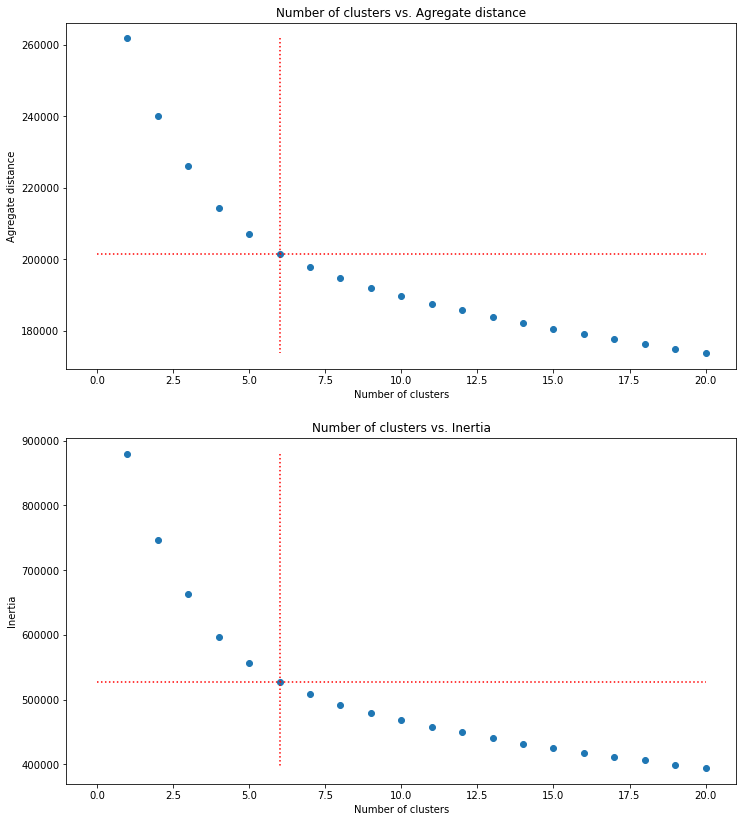

In [89]:
#WE TRY TO FIND THE OPTIMAL NUMBER OF CLUSTERS
#SUBPLOTS
fig, axs = plt.subplots(2,1)
fig.set_size_inches(12, 14)

#AGREGATE DISTANCE
axs[0].scatter(x = range(1,21),y = dist)
axs[0].set_xlabel("Number of clusters")
axs[0].set_ylabel("Agregate distance")
axs[0].vlines(6,ymin =dist[0], ymax = dist[19],color = 'red', linestyles = 'dotted')
axs[0].hlines(dist[5],xmin = 0, xmax = 20,color = 'red', linestyles = 'dotted')
axs[0].title.set_text('Number of clusters vs. Agregate distance')

#INERTIA
axs[1].scatter(x = range(1,21),y = inert)
axs[1].set_xlabel("Number of clusters")
axs[1].set_ylabel("Inertia")
axs[1].vlines(6,ymin =inert[0], ymax = inert[19],color = 'red', linestyles = 'dotted')
axs[1].hlines(inert[5],xmin = 0, xmax = 20,color = 'red', linestyles = 'dotted')
axs[1].title.set_text('Number of clusters vs. Inertia')

#BEST NUMBER OF CLUSTERS PRINT
kl = kneed.KneeLocator(np.arange(1, np.size(dist)+1), dist[:,0], curve="convex", direction="decreasing")
print("Optimal number of clusters (based on agregate distance): " + str(kl.elbow))
kl = kneed.KneeLocator(np.arange(1, np.size(inert)+1), inert[:,0], curve="convex", direction="decreasing")
print("Optimal number of clusters (based on inertia): " + str(kl.elbow))

>With the K-Means algorithm, we find that the optimal number of clusters is 6 clusters, based on both agregate distance (prefered) and inertia.<br>
<br>
>Let us compare this output to output given by the sklearn.cluster package built-in function $K$-Means that also computes the optimal partition based on the K-means algorithm.<br>
>The function returns a result based on the inertia but not on the aggregate distance. We still need to code a function to find the inertia for several number of clusters. Then, as we did before, we choose the number of cluster using the elbow method.

In [92]:
#SAME BUT WITH THE K-MEANS SKLEARN IN-BUILT FUNCTION
def dist_per_cluster_with_Kmean_python(y,max_k,replic):
    """
    runs the sklearn K-Means algorithm:
    -for a dataset 'y'
    -for the 'k' first integer
    -by setting the number of different initial states per cluster to 'replic'
    """
    dist = np.zeros([max_k,1])
    #‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence
    mods = []
    for k in np.arange(1,max_k+1):
        kmeans = KMeans(init="k-means++",n_clusters=k,n_init=replic,max_iter=300,random_state=42)
        output = kmeans.fit(y)        
        dist[k-1] = output.inertia_
        mods.append(output)
    return dist, mods

#WE RUN IT
inertia_all, mods = dist_per_cluster_with_Kmean_python(data,20,20)

Optimal number of clusters: 6


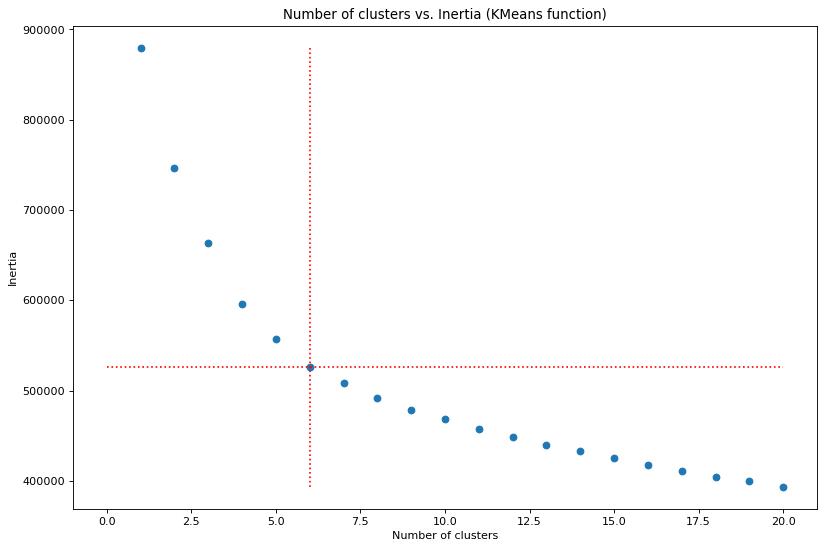

In [91]:
#WE TRY TO FIND THE OPTIMAL NUMBER OF CLUSTERS
#BASED ON INERTIA
figure(figsize=(12, 8), dpi=80)
plt.scatter(x = range(1,21),y = inertia_all)
plt.vlines(6,ymin =inertia_all[0], ymax = inertia_all[19],color = 'red', linestyles = 'dotted')
plt.hlines(inertia_all[5],xmin = 0, xmax = 20,color = 'red', linestyles = 'dotted')
plt.title('Number of clusters vs. Inertia (KMeans function)')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

#BEST NUMBER OF CLUSTERS PRINT
kl = kneed.KneeLocator(np.arange(1, np.size(inertia_all)+1), inertia_all[:,0], curve="convex", direction="decreasing")
print("Optimal number of clusters: " + str(kl.elbow))

>Both the handmade and the built-in function gave us an optimal number of clusters of 6.<br>
<br>
>However we are using the $K$-Means technique in a case where we have no idea about the number of clusters. We can group the observations into a multiple number of groups, and the aggregate distance assessment suggests that the most relevant number is 4. There may be multiple different but equally good clustering solutions for the dataset depending on the clustering and agregate distance / inertia assessment methods. In many cases the choice between the solutions would be rather arbitrary because the $K$-Means, as all the other clustering algorithms, is an unsupervised methods<br>
<br>
>In other words, the fact that the used approach returns 6 as the optimal number of clusters does not imply that there are 6 separate groups of observations. In order to test this empirically we could generate a random dataset with 80,000 observations and 11 variables and repeat the procedure. The function would still return an optimal number of clusters (maybe even 4), but since the data was generated randomly we would know that the actual number should be none (or 1).<br>
<br>
>Furthermore, $K$-Means is based on euclidean distance and observations are clustered according to the closest centroid. Which means that it assumes the clusters to be of more or less equal sizes. Therefore, if there is 2 huge cluster and 10 smaller ones in the data, the smaller ones would likely not be differentiated into separate groups.<br>
<br>
>However clustering is often a subjective procedure and there might not be an objective way to select the number of clusters. For example, we can consider the clustering of students from EDHEC. We might cluster them based on the GPA, or on the size, or on the gender, or on what they eat, or on what music they listen to... All of these groupings would be different, yet all of them would also be valid. Same idea extends to the number of clusters. We might cluster students based on whether their sizes. And we might divide these sizes samples further into GPA clusters - giving more clusters. In both cases we would be right in our own way.<br>
<br>
>We can try other methods for determining how many clusters of the dataset there exist such as doing PCA and trying to visualize the scatter on the first 2 or 3 first components, to see if there are areas of densely populated points, separated by less-densely populated borders : we'll do this in the next question.

**3. (4 points) Make a scatter plot of the first two principal components ? Discuss your
result.**

> We start by standardizing our data and we create the correlation matrix

In [58]:
df_PCA = df.copy()

#CORRELATION MATRIX
correlation_mat = df_PCA.corr()

#PCA_SCALED
df_PCA_scaled = StandardScaler().fit_transform(df_PCA)
df_PCA = pd.DataFrame(df_PCA_scaled, columns = df.columns)
df_PCA

,Call prices,V0,kappa,theta,sigma,rho,eta_v,rf,div,S0/K,K
0,0.370944,-0.340295,-0.804774,-1.091258,-0.631779,-0.739859,1.230402,0.869896,-0.984398,-0.853735,1.326617
1,-0.292052,-1.168653,0.874979,0.795592,-0.165485,-0.140519,0.267703,0.148866,-0.691005,-0.264664,0.807293
2,0.079001,0.454470,-0.004869,0.877292,0.533885,-1.138325,-0.563781,0.148866,-0.691005,-0.264664,0.807293
3,0.654605,-0.356975,-0.130772,0.367666,-0.482640,1.658979,-0.118108,0.869896,-0.984398,1.048900,-0.187314
4,1.652433,1.454895,-0.876521,-0.618961,0.047632,0.226858,1.229737,0.148866,-0.691005,-1.447537,1.931895
...,...,...,...,...,...,...,...,...,...,...,...
79994,-0.101612,-0.545585,1.486654,-0.234943,1.025978,-0.149614,-0.408852,0.869896,-0.984398,0.734179,0.028962
79995,-0.078394,-0.400221,-1.646084,-1.455000,-1.239349,-1.294788,-1.511136,-1.197555,0.721075,0.882792,-1.353620
79996,1.253661,1.344022,0.291346,1.539019,-0.982525,1.197975,1.252566,-1.197555,0.721075,0.882792,-1.353620
79997,-1.870288,-1.450354,-1.342226,-1.331902,0.675394,1.133233,0.631577,-1.197555,0.721075,-1.213797,0.124412


> We can make a plot of our correlation matrix

<AxesSubplot:>

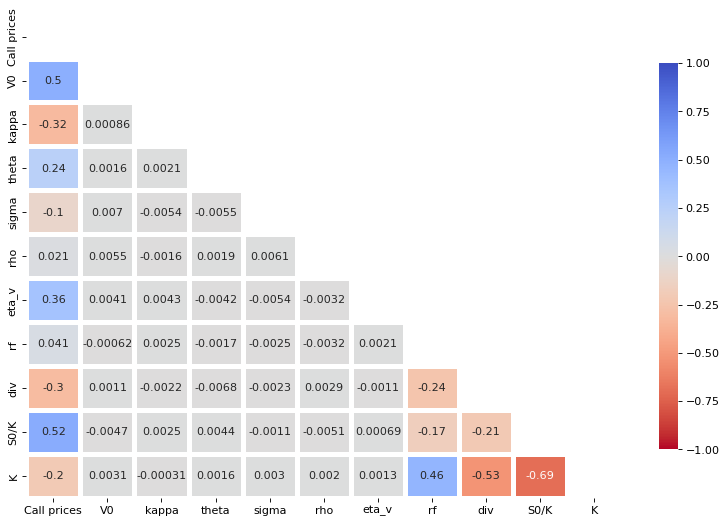

In [59]:
#CORRELATION MATRIX PLOT
mask = np.triu(np.ones_like(correlation_mat, dtype=bool))
f, ax = plt.subplots(figsize=(12, 8), dpi=80)
sns.heatmap(correlation_mat,annot=True,mask=mask,cmap='coolwarm_r', 
            center=0,vmin = -1, vmax=1, linewidths=3, cbar_kws={"shrink": 0.8})


> We compute the first 3 principal components and print them

In [60]:
#EIGENVECTORS
eigenValues, eigenVectors = np.linalg.eig(correlation_mat)

#SORTED BY EIGENVALUES
idx = np.argsort(eigenValues)[::-1]
eigenVectors = eigenVectors[:,idx]
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:, :3]

eigenVectors = eigenVectors.T[::-1]
PC_computed = pd.DataFrame(index=range(79999),columns = ["PC1","PC2","PC3"])

#COMPUTED FOR ALL OBSERVATIONS
for i in range(len(df_PCA)):
    PC1 = (np.array(df_PCA.iloc[i,:])*eigenVectors[2]).sum()
    PC2 = (np.array(df_PCA.iloc[i,:])*eigenVectors[1]).sum()
    PC3 = (np.array(df_PCA.iloc[i,:])*eigenVectors[0]).sum()
    PC_computed.PC1[i]=PC1 
    PC_computed.PC2[i]=PC2 
    PC_computed.PC3[i]=PC3 

#PRINT OF THE 3 FIRST PRINCIPAL COMPONENTS
PC_computed

,PC1,PC2,PC3
0,1.194166,-1.729581,0.198919
1,1.040343,-0.296757,-0.807681
2,0.571736,-0.876763,-0.130381
3,-0.666172,-1.11403,-1.072134
4,0.603235,-2.696473,1.859532
...,...,...,...
79994,0.409003,-0.259685,-1.911909
79995,-1.379154,1.69458,-0.441393
79996,-2.827925,-0.080397,1.41939
79997,1.421206,1.97217,0.65503


In [66]:
df.columns

Index(['Call prices', 'V0', 'kappa', 'theta', 'sigma', 'rho', 'eta_v', 'rf',
       'div', 'S0/K', 'K'],
      dtype='object')

> Indeed we have computed the eigenvectors with their associated eigenvalues

In [70]:
#PRINT OF THE EIGENVECTORS AND THE EIGENVALUES
pd.DataFrame(eigenVectors.T, index = df.columns,columns = [str(round(elem,3)) for elem in eigenValues][:3])

,2.195,1.861,1.139
Call prices,0.118034,-0.480147,-0.485137
V0,0.457122,-0.280897,-0.200804
kappa,-0.272768,0.172551,0.127253
theta,0.154647,-0.135008,-0.096611
sigma,-0.067700,0.052918,0.041483
rho,0.065265,-0.010820,-0.007055
eta_v,0.299009,-0.203405,-0.145691
rf,-0.106814,-0.386605,0.283515
div,0.537199,0.533496,-0.075322
S0/K,-0.527086,-0.021584,-0.546608


> We verify that the covariance between the different principal components $\approx 0$

In [71]:
#COVARIANCE BETWEEN PRINCIPAL COMPONENTS
cov1 = np.cov(PC_computed.PC1.astype('float64'),PC_computed.PC2.astype('float64')) [0,1]
cov2 = np.cov(PC_computed.PC1.astype('float64'),PC_computed.PC3.astype('float64')) [0,1]
cov3 = np.cov(PC_computed.PC2.astype('float64'),PC_computed.PC3.astype('float64')) [0,1]
cov1, cov2, cov3

(-2.8005631847755917e-15, -3.4348938659319576e-16, 1.9599701135446125e-15)

> We also verify that principal components explain 100% of the variability

In [72]:
numcomp, perc = 0, 0
tot = eigenValues.sum()

#% OF VARIANCE EXPLAINED
for Lambda in eigenValues[:10]:
    numcomp+=1
    perc += (Lambda/tot)*100
    print(numcomp,"principal components explains",round(perc,2),"% of variance")

1 principal components explains 19.95 % of variance
2 principal components explains 36.88 % of variance
3 principal components explains 47.23 % of variance
4 principal components explains 56.46 % of variance
5 principal components explains 65.59 % of variance
6 principal components explains 74.7 % of variance
7 principal components explains 83.73 % of variance
8 principal components explains 92.69 % of variance
9 principal components explains 99.23 % of variance
10 principal components explains 99.89 % of variance


> Finally, we can plot the 2 first principal components :<br>
> We clearly see 10 clusters. Would this mean that there is 10 clusters of different type of options that could be identified ?<br>
> This is a bit of an odd result as we found an ideal number of clusters of 6 with K-Means clustering in the last question.

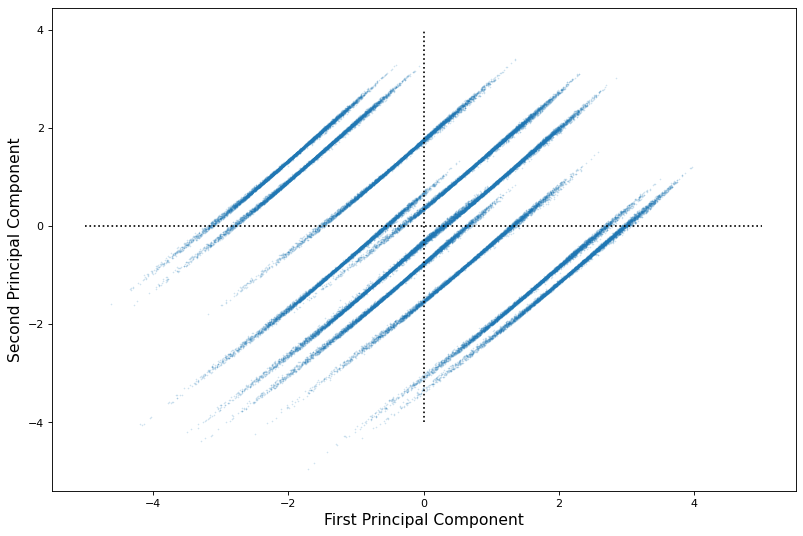

In [73]:
#PLOT OF THE 2 FIRST PRINCIPAL COMPONENTS (2D GRAPH)
fig, ax = plt.subplots(figsize=(12, 8), dpi=80)
plt.scatter(x =PC_computed.PC1, y = PC_computed.PC2, s = 0.1, alpha = 0.3)
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
plt.vlines(0,ymin =-4, ymax = 4,color = 'black', linestyles = 'dotted')
plt.hlines(0,xmin = -5, xmax = 5,color = 'black', linestyles = 'dotted')

>In the next cell, we make a 3-dimensions scatter plot of the 3 first components: <br>
>This time, we retreive what seems to be the 6 clusters ! (the result of the K-Means clustering method).

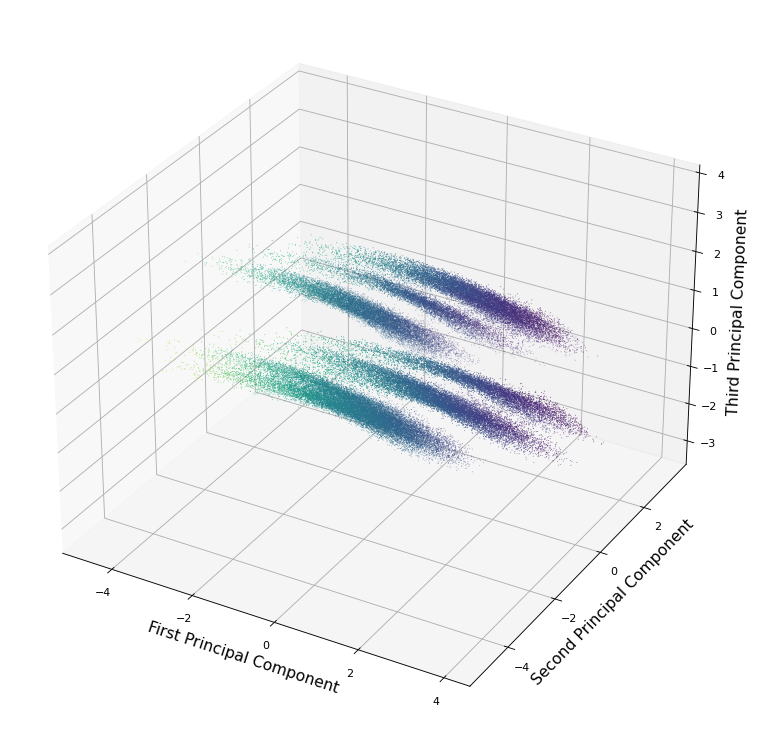

In [74]:
figure(figsize=(12, 12), dpi=80)
ax = plt.axes(projection='3d')

#PLOT OF THE 3 FIRST PRINCIPAL COMPONENTS (3D GRAPH)
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)

ax.scatter(xs = PC_computed.PC1, ys = PC_computed.PC2, zs = PC_computed.PC3, c = df["Call prices"],s = 0.1,linewidth=0.5)

**4. (13 points) Take the first 5 000 observations of the dataset. Focusing on this shorter
sample and using a leave-one-out cross-validation approach, find a model that delivers
good ’Call prices’ predictions according to the RMSE metric. You should at least reach
an RMSE below 25.**

> To begin with, we import the data

In [110]:
#IMPORT
path = "/Users/corneliuscellier/Downloads/"
data = pd.read_excel(path + "Heston.xlsx").head(5000)
data.describe()
df = data.copy().head(5000)
columns = df.columns
dim = np.shape(df)
N = dim[0]
#CREATION OF Y TARGET VARIABLE AND X THE DATA ARRAY
y = np.zeros([N,1])
y[:,0] = pd.to_numeric(df["Call prices"])

df.drop(columns=["Call prices"],axis=1, inplace = True)
X = np.ones([N,10])
for i in range(10):
    X[:,i] = (df[df.columns[i]])

> The idea here is to create a linear regression model so that the performance measured by the RMSE is below 25.<br>
> We first look at a model with all the variables:

In [111]:
#EVALUATION OF A MODEL WITH EVERY VARIABLES
model = sm.OLS(y,X[:,0:10]).fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                          2.456e+04
Date:                Sat, 27 Nov 2021   Prob (F-statistic):                        0.00
Time:                        12:44:25   Log-Likelihood:                         -23774.
No. Observations:                5000   AIC:                                  4.757e+04
Df Residuals:                    4990   BIC:                                  4.763e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           263.9861      2.763     95.529      0.000     258.569     269.404
x2           -17.4539      0.281    -62.089      0.000     -18.005     -16.903
x3           321.9937      7.266     44.317      0.000     307.750     336.238
x4           -28.1278      1.461    -19.256      0.000     -30.992     -25.264
x5            10.3227      2.030      5.085      0.000       6.343      14.302
x6            33.1857      0.473     70.167      0.000      32.258      34.113
x7          5599.4936    377.053     14.851      0.000    4860.304    6338.683
x8         -1.961e+04    305.840    -64.117      0.000   -2.02e+04    -1.9e+04
x9           407.7078      3.793    107.484      0.000     400.271     415.144
x10            0.0042      0.004      1.184      0.237      -0.003       0.011
==============================================================================
Omnibus:                     1248.848   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5784.827
Skew:                           1.135   Prob(JB):                         0.00
Kurtosis:                       7.756   Cond. No.                     9.08e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> The tenth variable is not significant at the 99% confidence level and is removed from the model:

In [112]:
#EVALUATION OF A MODEL WITH THE 9 FIRST VARIABLES
model = sm.OLS(y,X[:,0:9]).fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                          2.728e+04
Date:                Sat, 27 Nov 2021   Prob (F-statistic):                        0.00
Time:                        12:44:25   Log-Likelihood:                         -23775.
No. Observations:                5000   AIC:                                  4.757e+04
Df Residuals:                    4991   BIC:                                  4.763e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           264.1471      2.760     95.699      0.000     258.736     269.558
x2           -17.4419      0.281    -62.084      0.000     -17.993     -16.891
x3           322.6075      7.248     44.513      0.000     308.399     336.816
x4           -28.0409      1.459    -19.220      0.000     -30.901     -25.181
x5            10.1116      2.022      5.000      0.000       6.147      14.076
x6            33.2112      0.472     70.291      0.000      32.285      34.138
x7          5828.7551    323.530     18.016      0.000    5194.494    6463.016
x8         -1.939e+04    242.544    -79.940      0.000   -1.99e+04   -1.89e+04
x9           406.6731      3.691    110.171      0.000     399.437     413.910
==============================================================================
Omnibus:                     1256.556   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5821.947
Skew:                           1.142   Prob(JB):                         0.00
Kurtosis:                       7.767   Cond. No.                     2.94e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> Let us calculate the RMSE of these 2 models using the 'leave one out' approach. We first create the Leave one out function:

In [113]:
#LEAVE ONE OUT CROSS VALIDATION FUNCTION
def CV_loo(y,X):
    """
    This function returns the linear regression RMSE with the leave-one-out cross validation
    for a given target variable 'y'
    and given variables 'X'
    """
    N = np.size(y)
    
    if(np.size(X,0)!=N):
        sys.exit("Dimension issue")
    
    residuals = np.zeros([N,1])
    
    for i in range(0,N):
        #WE RUN N TIMES THE MODEL, TRAINED ON ALL THE OBSERVATIONS EXCEPT 1 
        idx_keep = np.ones([N],dtype=bool)
        idx_keep[i] = False
        
        #WE PREDICT THE LASTING OBSERVATION
        model = sm.OLS(y[idx_keep],X[idx_keep,:]).fit() 
        prediction = model.predict(X[i,:])
        #WE COMPUTE THE RESIDUALS
        residuals[i] = y[i]-prediction
    
    #WE COMPUTE AND RETURN THE RMSE
    RMSE = np.sqrt(np.mean(residuals**2))
    
    return RMSE

> We run it on the 2 first models:

In [88]:
#RMSE WITH ALL VARIABLES
RMSE = CV_loo(y,X[:,0:9])
print("With a model composed of the 9 first variable, have a RMSE of :",RMSE)

#A MODEL WITH THE 9 FIRST VARIABLES
RMSE = CV_loo(y,X[:,0:10])
print("A model composed of every variables has a RMSE of :",RMSE)

With a model composed of the 9 first variable, have a RMSE of : 28.16682142283986
A model composed of every variables has a RMSE of : 28.16904190559955


> As we could have expected, the 10th variable doesn't improve the RMSE this much.<br>
>Unfortunately, we have $RMSE> 25$: we will try a new approach to improve the model<br>
<br>
> All the variables at the same time are not sufficient for the model to return an RMSE of less than $\approx 28.17$. It may not make sense to run a linear regression on a dataset containing several types of options! Therefore, let us look for clusters in the dataset using the K-Means approach, and create a model for each of the k clusters identified to calculate a total $RMSE_t$.

> First, we calculate the ideal number of clusters which is 4:

Optimal number of clusters (based on agregate distance): 4


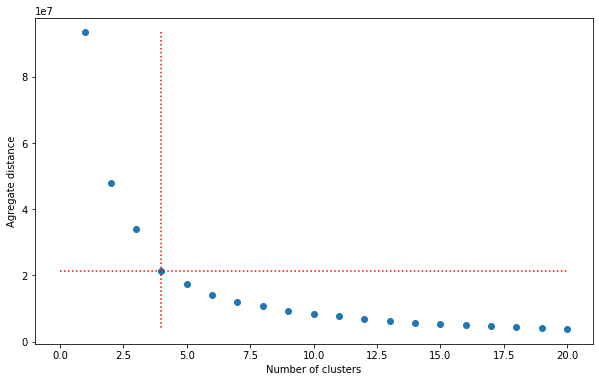

In [93]:
#WE RUN THE CLUSTERING FUNCTION IT AND PRINT THE IDEAL NUMBER OF CLUSTERS BASED ON AGREGATE DISTANCE
#CLUSTERING
dist, inert = dist_per_cluster_with_Kmean_python(data,20,20)

#SUBPLOTS
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

ax.scatter(x = range(1,21),y = dist)
ax.set_xlabel("Number of clusters")
ax.set_ylabel("Agregate distance")
plt.vlines(4,ymin =dist[0], ymax = dist[19],color = 'red', linestyles = 'dotted')
plt.hlines(dist[3],xmin = 0, xmax = 20,color = 'red', linestyles = 'dotted')

#OPTIMAL AGREGATE DISTANCE
kl = kneed.KneeLocator(np.arange(1, np.size(dist)+1), dist[:,0], curve="convex", direction="decreasing")
print("Optimal number of clusters (based on agregate distance): " + str(kl.elbow))

> We will try this method for 6 clusters (clustering question ressult on the whole dataset) and 4 clusters (result with the 5000 first observations only). For each cluster, we create a different model and we calculate each cluster's RMSE

In [115]:
#WE CREATE THE 6 CLUSTERS
data["6"]= inert[5].labels_

data6_1 = data[data['6'] == 0]
data6_2 = data[data['6'] == 1]
data6_3 = data[data['6'] == 2]
data6_4 = data[data['6'] == 3]
data6_5 = data[data['6'] == 4]
data6_6 = data[data['6'] == 5]

y6_1 = data6_1['Call prices']
y6_2 = data6_2['Call prices']
y6_3 = data6_3['Call prices']
y6_4 = data6_4['Call prices']
y6_5 = data6_5['Call prices']
y6_6 = data6_6['Call prices']

data6_1.drop(columns = ['6','Call prices'],inplace = True)
data6_2.drop(columns = ['6','Call prices'],inplace = True)
data6_3.drop(columns = ['6','Call prices'],inplace = True)
data6_4.drop(columns = ['6','Call prices'],inplace = True)
data6_5.drop(columns = ['6','Call prices'],inplace = True)
data6_6.drop(columns = ['6','Call prices'],inplace = True)

#WE COMPUTE EACH CLUSTER'S RMSE USING THE LEAVE-ONE OUT APPROACH
xs = [elem.to_numpy() for elem in [data6_1,data6_2,data6_3,data6_4,data6_5,data6_6]]
ys = [elem.to_numpy() for elem in [y6_1,y6_2,y6_3,y6_4,y6_5,y6_6]]
RMSE_model=[]
smm = 0
ni=[]

for i in range(0,6):
    print("Culster", str(i+1)+"'s OLS model RMSE:",round(CV_loo(y = ys[i], X = xs[i]),2),"|",len(ys[i]),"observations")
    RMSE_model.append(CV_loo(y = ys[i], X = xs[i]))
    ni.append(len(ys[i]))
    smm = smm + ni[i]* RMSE_model[i]**2
    
#WE COMPUTE AND PRINT THE TOTAL RMSE
tot_RMSE = np.sqrt((1/5000)*smm)

print("\nRMSE totale du modèle 6 clusters :" ,round(tot_RMSE,2))

Culster 1's OLS model RMSE: 19.24 | 897 observations
Culster 2's OLS model RMSE: 19.66 | 426 observations
Culster 3's OLS model RMSE: 24.37 | 697 observations
Culster 4's OLS model RMSE: 14.85 | 1082 observations
Culster 5's OLS model RMSE: 19.85 | 661 observations
Culster 6's OLS model RMSE: 16.94 | 1237 observations

RMSE totale du modèle 6 clusters : 18.79


> We compute the total RMSE (explained below):
>We know that $RMSE_{total} = \sqrt{\frac{1}{N_{total}} \times \sum_{i=1}^n (\hat{y_i}-y_i)^2}$<br>
<br>
There is 6 clusters $(C_1, C_2, C_3, C_4, C_5, C_6)$ and the cluster $i$ has a $RMSE_i$ of $\sqrt{\frac{1}{N_i} \times \sum_{j \subset C_i} (\hat{y_j}-y_j)^2}$, hence $\sum_{y_i \subset C_i} (\hat{y_j}-y_j)^2 = RMSE_i^2 \times N_i $<br>
<br>
i.e. we have :<br> $RMSE_{total} = \sqrt{\frac{1}{_{total}} \times \sum_{j=1}^6 \sum_{y_i \subset C_i}(\hat{y_j}-y_j)^2 } = \sqrt{\frac{1}{5000} \times (19.24^2.897 + 19.66^2.426 + 24.37^2.697 + 14.85^2.1082 + 19.85^2.661 + 16.94^2.1237)}$<br>
$ \approx 18.79 $ if there is 6 clusters

> Let us compute the RMSE of the 4 clusters model

In [95]:
#WE CREATE THE 6 CLUSTERS
data["4"]= inert[3].labels_
data4_1 = data[data['4'] == 0]
data4_2 = data[data['4'] == 1]
data4_3 = data[data['4'] == 2]
data4_4 = data[data['4'] == 3]
y4_1 = data4_1['Call prices']
y4_2 = data4_2['Call prices']
y4_3 = data4_3['Call prices']
y6_4 = data4_4['Call prices']
data4_1.drop(columns = ['4','6','Call prices'],inplace = True)
data4_2.drop(columns = ['4','6','Call prices'],inplace = True)
data4_3.drop(columns = ['4','6','Call prices'],inplace = True)
data4_4.drop(columns = ['4','6','Call prices'],inplace = True)

#WE COMPUTE EACH CLUSTER'S RMSE USING THE LEAVE-ONE OUT APPROACH
xs = [elem.to_numpy() for elem in [data4_1,data4_2,data4_3,data4_4]]
ys = [elem.to_numpy() for elem in [y4_1,y4_2,y4_3,y6_4]]
RMSE_model=[]
ni=[]
smm = 0
for i in range(0,4):
    print("Culster", str(i+1)+"'s OLS model RMSE",round(CV_loo(y = ys[i], X = xs[i]),2),"|",len(ys[i]),"observations")
    RMSE_model.append(CV_loo(y = ys[i], X = xs[i]))
    ni.append(len(ys[i]))
    smm = smm + ni[i]* RMSE_model[i]**2

#WE COMPUTE AND PRINT THE TOTAL RMSE
tot_RMSE = np.sqrt((1/5000)*smm)
print("\nRMSE totale du modèle 4 clusters :" ,round(tot_RMSE,2))

Culster 1's OLS model RMSE 21.4 | 912 observations
Culster 2's OLS model RMSE 26.94 | 1289 observations
Culster 3's OLS model RMSE 16.74 | 1478 observations
Culster 4's OLS model RMSE 28.25 | 1321 observations

RMSE totale du modèle 4 clusters : 23.76


We have : $RMSE_{total} = \sqrt{\frac{1}{_{total}} \times \sum_{j=1}^4 \sum_{y_i \subset C_i}(\hat{y_j}-y_j)^2 } = \sqrt{\frac{1}{5000} \times  \times (21.4^2.912 + 26.94^2.1289 + 16.74^2.1478 + 28.25^2.1321 )}\approx 23.76 $ if there is 4 clusters


>This particular model is in fact composed of multiple models and delivers a RMSE below 25 for both 4 and 6 clusters. <br>
>Let us try to plot the 3 first PCAs to visualize the clusters : we first compute and print the 3 first principal components:

In [96]:
#WE CREATE THE PRINCIPAL COMPONENTS FOR THE 5000 OBSERVATIONS
df_PCA = data.copy()

#CORRELATION MATRIX
correlation_mat = df_PCA.corr()

#STANDARDIZATION
df_PCA_scaled = StandardScaler().fit_transform(df_PCA)
df_PCA = pd.DataFrame(df_PCA_scaled, columns = data.columns)

#CALCULATIONS OF THE 3 FIRST PRINCIPAL COMPOONENTS
eigenValues, eigenVectors = np.linalg.eig(correlation_mat)
idx = np.argsort(eigenValues)[::-1]
eigenVectors = eigenVectors[:,idx]
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:, :3]
eigenVectors = eigenVectors.T[::-1]

PC_computed = pd.DataFrame(index=range(5000),columns = ["PC1","PC2","PC3"])
for i in range(len(df_PCA)):
    PC1 = (np.array(df_PCA.iloc[i,:])*eigenVectors[2]).sum()
    PC2 = (np.array(df_PCA.iloc[i,:])*eigenVectors[1]).sum()
    PC3 = (np.array(df_PCA.iloc[i,:])*eigenVectors[0]).sum()
    PC_computed.PC1[i]=PC1 
    PC_computed.PC2[i]=PC2 
    PC_computed.PC3[i]=PC3 
    
#RINT
PC_computed

,PC1,PC2,PC3
0,-1.066863,0.336817,-1.56293
1,-0.454971,-0.635884,-0.234657
2,-0.274304,0.004876,-0.768321
3,-1.052482,1.802944,1.422145
4,-0.83905,1.321169,-3.056184
...,...,...,...
4995,-0.57581,1.991693,-1.02067
4996,0.640838,-0.813797,0.318205
4997,-1.926396,-0.620923,-1.370899
4998,-1.245269,-0.17253,-1.208743


> Now, we plot those 3 PCAs for the 5000 first observations in the dataset with colors depending on the cluster:<br>
> First the model with 4 clusters:

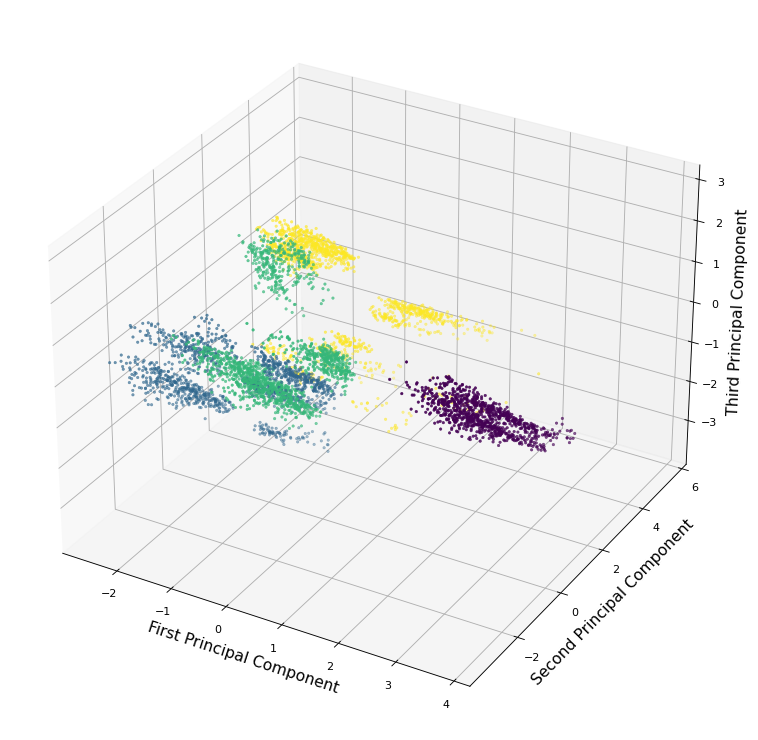

In [97]:
#PRINT OF THE 3 FIRST PRINCIPAL COMPONENTS + CLUSTERS (6 CLUSTERS)
data["4"]= inert[3].labels_
data["6"]= inert[5].labels_

figure(figsize=(12, 12), dpi=80)
ax = plt.axes(projection='3d')
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)
ax.scatter(xs = PC_computed.PC1, ys = PC_computed.PC2, zs = PC_computed.PC3, c = data["4"],s = 5,linewidth=0.5)

>Then we plot the same scatter plot but we set the plot colors to the cluster number with 6 clusters

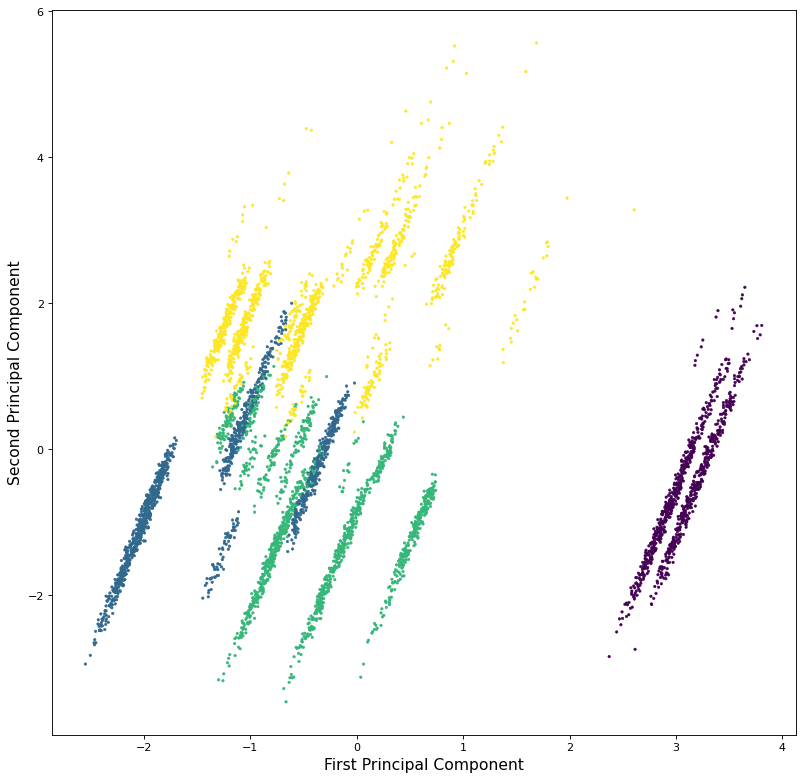

In [104]:
#PRINT OF THE 2 FIRST PRINCIPAL COMPONENTS + CLUSTERS (4 CLUSTERS)
figure(figsize=(12, 12), dpi=80)
plt.xlabel("First Principal Component", fontsize=14)
plt.ylabel("Second Principal Component", fontsize=14)
plt.scatter(x = PC_computed.PC1, y = PC_computed.PC2, c = data["4"],s = 5,linewidth=0.5)

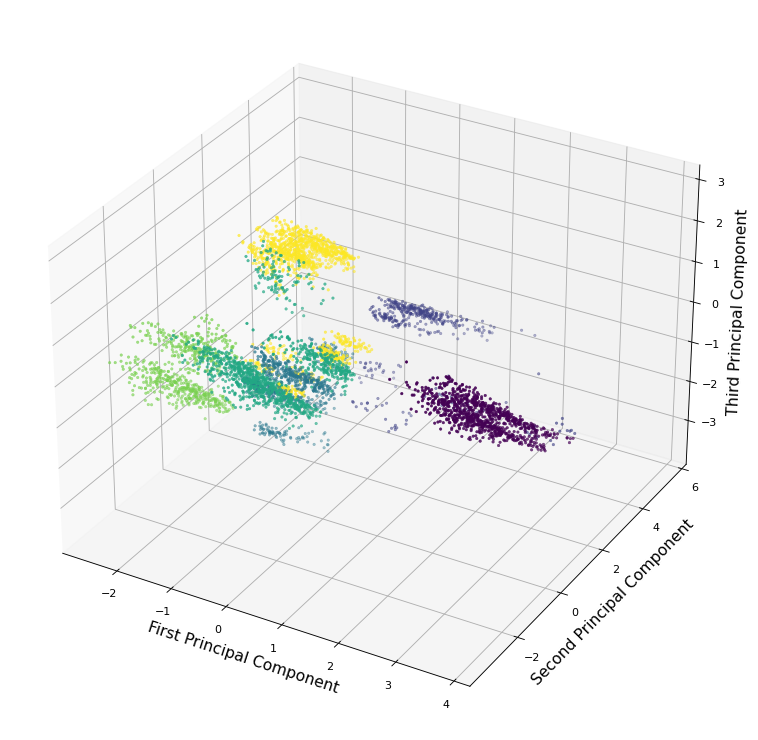

In [98]:
#PRINT OF THE 3 FIRST PRINCIPAL COMPONENTS + CLUSTERS (6 CLUSTERS)
figure(figsize=(12, 12), dpi=80)
ax = plt.axes(projection='3d')

ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)
ax.scatter(xs = PC_computed.PC1, ys = PC_computed.PC2, zs = PC_computed.PC3, c = data["6"],s = 5,linewidth=0.5)

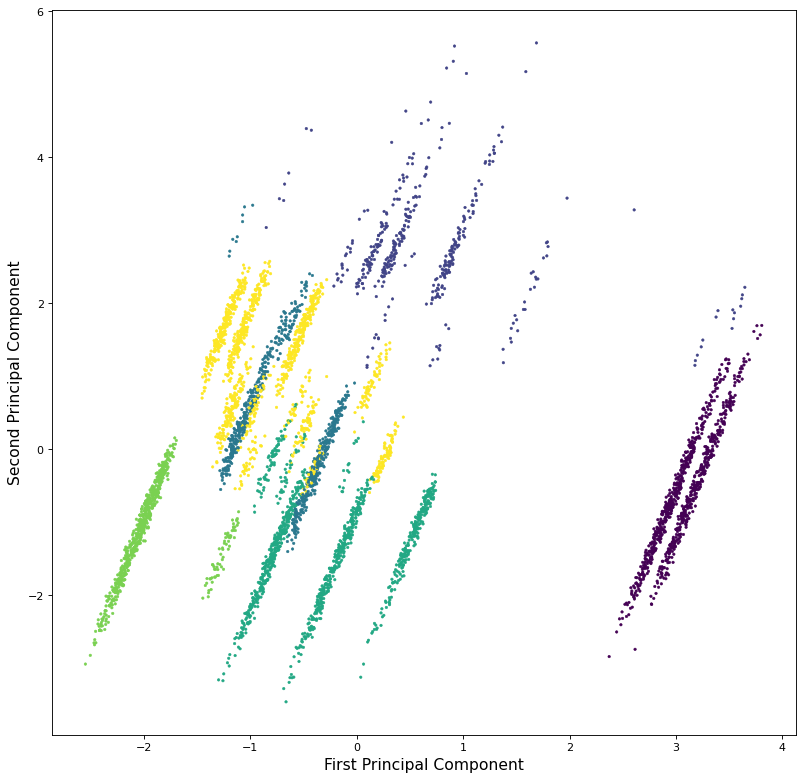

In [105]:
#PRINT OF THE 2 FIRST PRINCIPAL COMPONENTS + CLUSTERS (6 CLUSTERS)
figure(figsize=(12, 12), dpi=80)
plt.xlabel("First Principal Component", fontsize=14)
plt.ylabel("Second Principal Component", fontsize=14)
plt.scatter(x = PC_computed.PC1, y = PC_computed.PC2, c = data["6"],s = 5,linewidth=0.5)

> These clusters seems to be groups of different type of options whose 'call price' can be predicted more precisely by training k models on the k clusters individualy.